# Coca Cola

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
cola=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\CocaCola_Sales_Rawdata.csv")
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

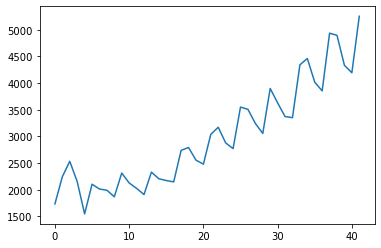

In [3]:
cola.Sales.plot()

In [4]:
len(cola['Sales'])

42

In [5]:
Train=cola.head(30)
Test=cola.tail(12)

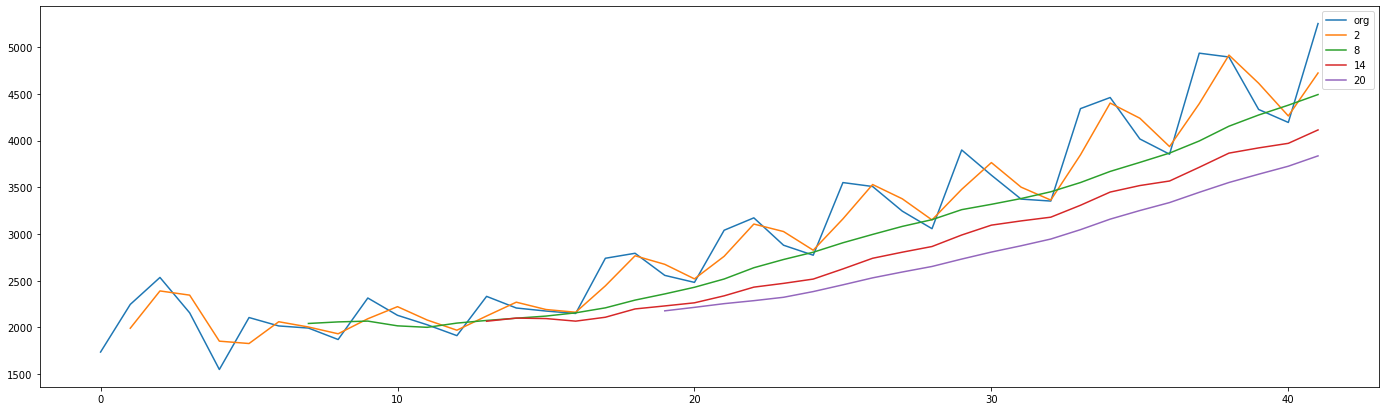

In [6]:
plt.figure(figsize=(24,7))
cola.Sales.plot(label='org')
for i in range(2,24,6):
    cola['Sales'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_11400/3330092939.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(cola.Sales,freq=12)


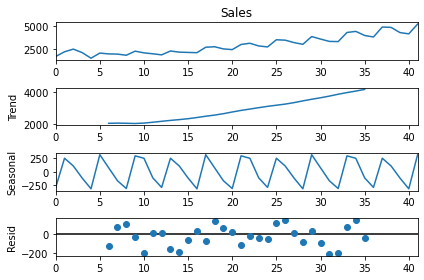

In [7]:
decompose_ts_add=seasonal_decompose(cola.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

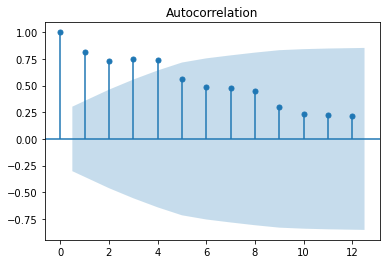

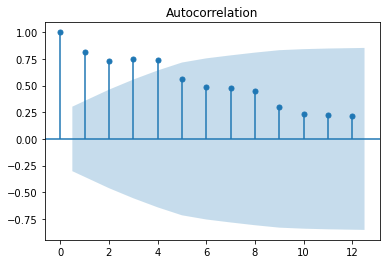

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_acf(cola.Sales,lags=12)
plt.show()

In [11]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [12]:
ses_model=SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.04676259794569

In [13]:
#holt method
hw_model=Holt(Train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_11400/618711967.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model=Holt(Train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)


11.213842163034272

In [16]:
hwe_model_add_add=ExponentialSmoothing(Train['Sales'],seasonal='add',trend='add',
                                       seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

7.359596284619166

In [17]:
hwe_model_add_add.forecast(10)

30    3722.978724
31    3572.791285
32    3509.701565
33    4045.426518
34    4031.018165
35    3807.439993
36    3723.060052
37    4310.076673
38    4307.509971
39    4143.077152
dtype: float64